In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train=[]
Y_train=[]
image_size=150
labels = ['Beetle','Butterfly','Cat','Cow','Dog','Elephant','Gorilla','Hippo','Lizard','Monkey','Mouse','Panda','Spider','Tiger','Zebra']
for i in labels:
    folderPath = os.path.join(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Training Data/Training Data',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(32407, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2  # Using MobileNetV2 as a pretrained model

# Initialize the model
model = Sequential()

# Use a pretrained MobileNetV2 model as a base (without the top classification layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add the pretrained base model to the custom model
model.add(base_model)

# Add additional layers for fine-tuning
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(15, activation='softmax'))

# Freeze the weights of the pretrained base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate (e.g., 0.001) and Adam optimizer
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 3, 3, 256)         2949376   
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 256)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 1, 1, 256)         1024      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
821/821 [==============================] - 87s 105ms/step - loss: 0.3441 - accuracy: 0.8856 - val_loss: 3.1048 - val_accuracy: 0.4950
Epoch 2/20
821/821 [==============================] - 86s 105ms/step - loss: 0.3264 - accuracy: 0.8912 - val_loss: 2.8350 - val_accuracy: 0.5135
Epoch 3/20
821/821 [==============================] - 86s 105ms/step - loss: 0.3011 - accuracy: 0.8985 - val_loss: 3.0358 - val_accuracy: 0.4974
Epoch 4/20
821/821 [==============================] - 86s 105ms/step - loss: 0.2871 - accuracy: 0.9048 - val_loss: 3.1288 - val_accuracy: 0.4875
Epoch 5/20
821/821 [==============================] - 86s 105ms/step - loss: 0.2689 - accuracy: 0.9096 - val_loss: 3.0839 - val_accuracy: 0.5053
Epoch 6/20
821/821 [==============================] - 87s 105ms/step - loss: 0.2647 - accuracy: 0.9110 - val_loss: 3.3579 - val_accuracy: 0.4991
Epoch 7/20
821/821 [==============================] - 86s 105ms/step - loss: 0.2425 - accuracy: 0.9188 - val_loss: 3.7506 - val_ac

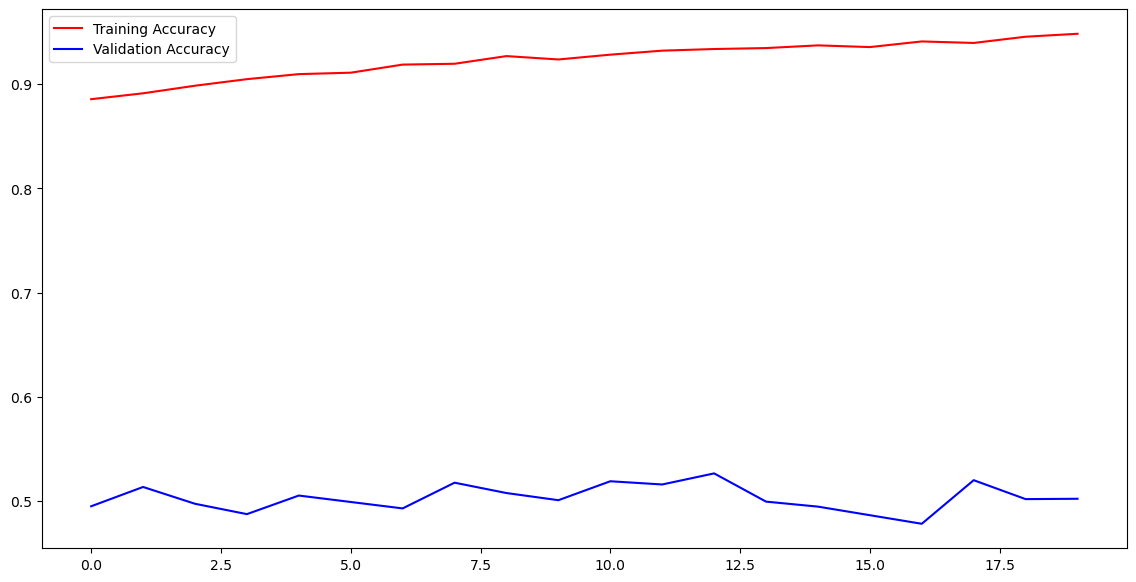

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

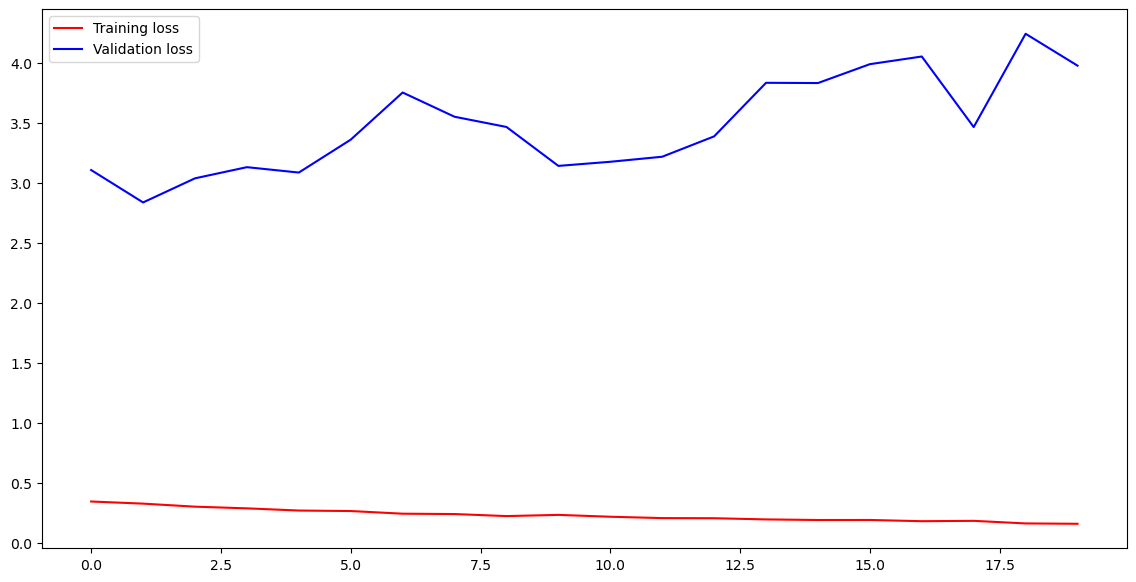

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

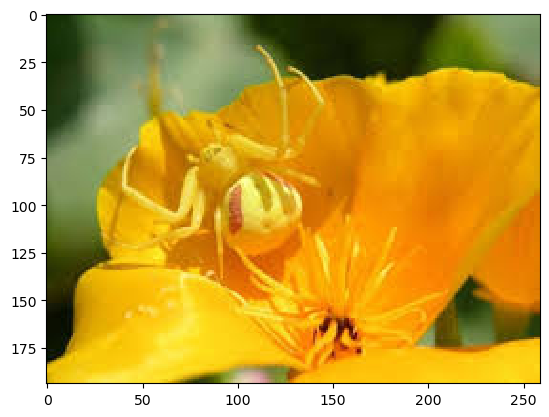

1/1 [==============================] - 0s 15ms/step
Spider


In [45]:
img = cv2.imread(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Spider/Spider-Test (78).jpeg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Spider/Spider-Test (78).jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

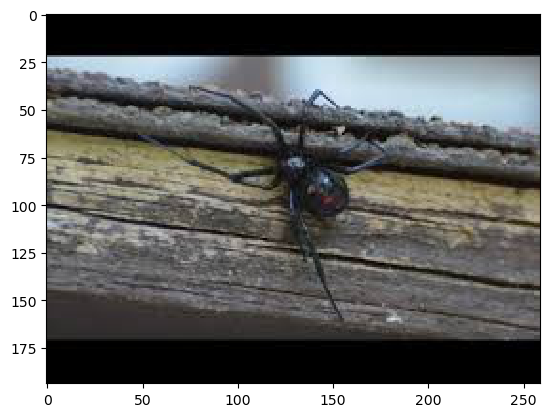

1/1 [==============================] - 0s 16ms/step
Spider


In [46]:
img = cv2.imread(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Spider/Spider-Test (68).jpeg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Spider/Spider-Test (68).jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

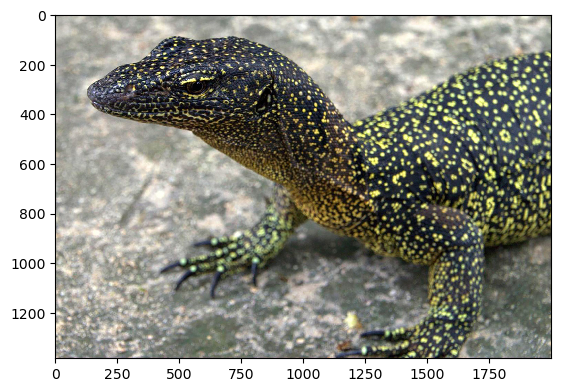

1/1 [==============================] - 0s 19ms/step
Lizard


In [47]:
img = cv2.imread(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Lizard/Lizard-Testing (55).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Lizard/Lizard-Testing (55).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

NameError: name 'Users' is not defined

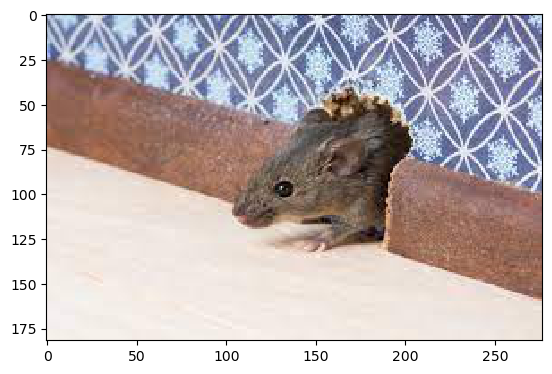

1/1 [==============================] - 0s 70ms/step
Mouse


In [49]:
img = cv2.imread(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Mouse/Mouse-Test (4).jpeg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/ANIMAL_SPECIES_PREDICTION/archive/Testing Data/Testing Data/Mouse/Mouse-Test (4).jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])